In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from pandas.plotting import radviz, parallel_coordinates
import matplotlib.pyplot as plt
from sklearn import metrics
import Orange
import matplotlib
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()

In [2]:
#file="biolab.si/leukemia.tab" # run
file="biolab.si/MLL.tab" # run
#file="biolab.si/SRBCT.tab" # run
#file="biolab.si/lungGSE1987.tab" # run
#file="biolab.si/prostata.tab" #run
#file="biolab.si/braintumor.tab" # run
#file="biolab.si/lung.tab"

data=Orange.data.Table(file)
x=data.X
y=data.Y

In [3]:
x.shape

(72, 12533)

In [4]:
x=pd.DataFrame(x)
x=(x-x.min())/(x.max()-x.min())

In [5]:
min(x),max(x)

(0, 12532)

In [6]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,12523,12524,12525,12526,12527,12528,12529,12530,12531,12532
0,0.554545,0.769513,0.225726,0.341649,0.140909,0.6596,0.882718,0.682574,0.094921,0.803911,...,0.045010,0.364936,0.494690,0.279961,0.447757,0.448759,0.029566,0.280900,0.866947,0.454833
1,0.672304,0.846077,0.593361,0.433839,0.538961,1.0000,0.758297,0.596322,0.813650,0.790503,...,0.241468,0.390746,0.318584,0.276265,0.296394,0.466312,0.032748,0.263666,0.906419,0.866004
2,0.649049,0.739821,0.506224,0.535792,0.331981,0.5470,0.715091,0.529772,0.168265,0.737430,...,0.000000,0.322365,0.391150,0.193256,0.339490,0.535461,0.111317,0.248232,0.975705,0.232159
3,0.536998,0.745780,0.510373,0.440347,0.068994,0.7440,0.648090,0.663748,0.052367,0.603352,...,0.098519,0.856555,0.253097,0.000000,0.000000,0.218085,0.132708,0.274277,0.899520,0.601626
4,0.653277,0.844091,0.352697,0.469631,0.507305,0.8930,0.972448,0.764448,0.095927,0.796089,...,0.083924,0.574293,0.819469,0.314527,0.565523,0.643617,0.033672,0.718006,0.771446,0.451069


In [106]:
binaryx=np.zeros((x.shape))

In [107]:
binaryx.shape

(72, 12533)

In [108]:
n,p=x.shape

In [112]:
for i in range(n):
    for j in range(p):
        if (x.values[i,j]<0.5):
            binaryx[i,j]=1
        else:
            binaryx[i,j]=0

In [113]:
np.unique(binaryx)

array([ 0.,  1.])

In [114]:
sumc=np.sum(binaryx,axis=0)

In [115]:
sumc.shape

(12533,)

In [117]:
sumc[:10]

array([ 37.,   2.,  37.,  32.,  44.,  10.,  13.,  20.,  67.,   4.])

In [118]:
sumhigh=sumc[sumc>60]

In [120]:
len(sumhigh)

3871

In [4]:
#u, s, vh = np.linalg.svd(a, full_matrices=True)
from numpy.linalg import svd
# A=U*S*V^T, V^T=vh
# A*v_i=s_i*u_i
# A^T*u_i=s_i*v_i

In [76]:
u,s,vh=svd(x,full_matrices=True)

In [77]:
u.shape, s.shape,vh.shape

((72, 72), (72,), (12533, 12533))

In [78]:
u0=x.dot(vh[0,:]) # X*vh[i,:]=s_i*u[i,:]
v0=x.T.dot(u[:,0]) # X^T*u[:,i]=s_i*vh[i,:]
# v0=s[0]*vh[0,:]
# u0=s[0]*u[:,0]

In [79]:
u0.shape

(72,)

In [80]:
v0.shape

(12533,)

In [81]:
n,p=x.shape

In [82]:
n,p

(72, 12533)

In [83]:
V=vh[:n,:]

In [84]:
V.shape

(72, 12533)

In [85]:
subspace=[]
for i in range(n):
    ui=u[:,i]
    sim=np.zeros(p)
    for j in range(p):
        xj=x[:,j]
        similarity=np.dot(xj,ui)/np.sqrt(np.dot(xj,xj)*np.dot(ui,ui))
        sim[j]=similarity

    idx=np.argmax(sim)
    subspace.append(idx)




In [86]:
len(subspace)

72

In [87]:
len(np.unique(subspace))

72

In [88]:
X=x[:,subspace]

In [89]:
X.shape

(72, 72)

In [90]:
x=pd.DataFrame(X)
x=(x-x.min())/(x.max()-x.min())

In [91]:
x.shape

(72, 72)

In [62]:
def cradviz(x,alpha):
    #alpha
    m=len(x)
    theta=np.zeros(m)
    for i in range(m):
        theta[i]=alpha[i]#*x[i]+alpha[i,1]*(1-x[i])
    anchor=np.array([np.cos(theta),np.sin(theta)])
    if np.sum(x)!=0.0:
        p=np.dot(anchor,x)/np.sum(x)
    else:
        p=np.zeros(2)
    return p
def circleradviz(X,a):
	#p=sum 
	(n,m)=X.shape
	Y=np.zeros((n,2))
	for i in range(n):
		Y[i]=cradviz(X[i],a)
	return Y
def DimensionAnchor(m):
    an=np.zeros(m)
    for i in range(m):
        an[i]=i*np.pi*2/m
    return an

In [92]:
m=4
anchor=DimensionAnchor(m)
best_score=0.0

col=x.columns.values
select=col[range(m)]
X=x[select].values
Y=circleradviz(X,anchor)
best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
best_select=select
print(best_score,best_select)

0.118503271207 [0 1 2 3]


In [93]:
#m=4
anchor=DimensionAnchor(m)
best_score=0.0
col=x.columns.values
#select=[1335+1,3544+1,1395+1,3993+1,186+1]
select=col[range(m)]
X=x[select].values
Y=circleradviz(X,anchor)
best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
best_select=select
for i in col[m:]:
    select=best_select.copy()
    for j in range(m):
        c_select=select.copy() 
        c_select[j]=i
        X=x[c_select].values
        Y=circleradviz(X,anchor)
        score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
        if (best_score<score):
            best_score=score
            best_select=c_select#.copy()
print(best_score,best_select)

0.341852218628 [7 1 2 6]


Score:  0.341852218628


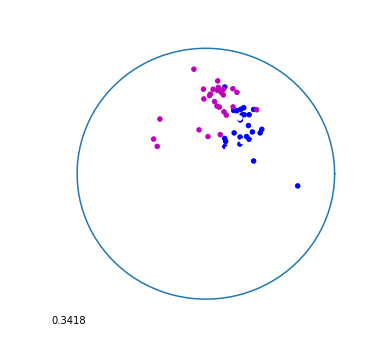

In [94]:
#select=[1767, 1276, 1674, 1375]
select=best_select#[1293, 1556, 4517, 1727, 5058, 1375]
X=x[select].values
Y=circleradviz(X,anchor)

best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
print('Score: ', best_score)

# define color
classes=np.unique(y)
#colors=plt.cm.rainbow(np.linspace(0,1,len(classes)))
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
markers=['x','o','v','^','>','<','s','p','h']
cm = matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(6,6))
cy=pd.factorize(y)[0]
t=np.linspace(0,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t))


plt.scatter(Y[:,0],Y[:,1],c=y,cmap=cm,s=20)
    
#plt.legend()

plt.xlim(-1.3,1.3)
plt.ylim(-1.3,1.3)

plt.text(-1.2,-1.2,str(best_score)[:6])

plt.axis('off')
plt.show()

In [98]:
#m=8
#anchor=DimensionAnchor(m)
#best_score=0.0
#col=x.columns.values
#select=[1335+1,3544+1,1395+1,3993+1,186+1]
select=best_select#col[range(m)]
X=x[select].values
Y=circleradviz(X,anchor)
best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
best_select=select

for i in col[0:]:
    select=best_select.copy()
    #if (i not in best_select):
    for j in range(m):
        c_select=select.copy()
        if (c_select[j]!=i):
            c_select[j]=i
            X=x[c_select].values
            Y=circleradviz(X,anchor)
            score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
            if (best_score<score):
                best_score=score
                best_select=c_select#.copy()
                
print(best_score)
print(best_select)

0.373188638
[5 1 2 6]


Score:  0.373188638


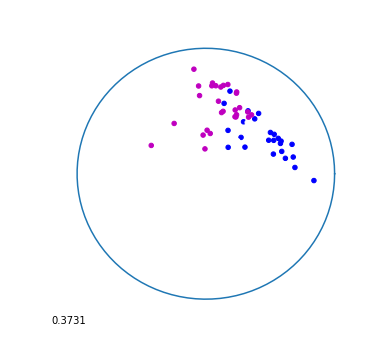

In [96]:
#select=[1767, 1276, 1674, 1375]
select=best_select#[1293, 1556, 4517, 1727, 5058, 1375]
X=x[select].values
Y=circleradviz(X,anchor)

best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
print('Score: ', best_score)

# define color
classes=np.unique(y)
#colors=plt.cm.rainbow(np.linspace(0,1,len(classes)))
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
markers=['x','o','v','^','>','<','s','p','h']
cm = matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(6,6))
cy=pd.factorize(y)[0]
t=np.linspace(0,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t))


plt.scatter(Y[:,0],Y[:,1],c=y,cmap=cm,s=20)
    
#plt.legend()

plt.xlim(-1.3,1.3)
plt.ylim(-1.3,1.3)

plt.text(-1.2,-1.2,str(best_score)[:6])

plt.axis('off')
plt.show()